In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,plot_roc_curve,confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [132]:
#Import the dataset from a csv file
df=pd.read_csv('winequality-red.csv')

In [133]:
df.shape

(1599, 12)

The dataset consists of 1599 rows and 12 columns

In [134]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


the dataset has all features as float type and label as integer type and no null values are present

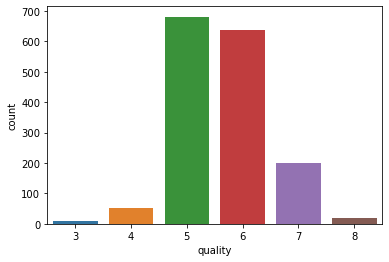

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [137]:
#univariate analysis
#Count of all the classes of Feature
sns.countplot(df['quality'])
plt.show()
print(df['quality'].value_counts())

we can see that in quality, rating 5 followed by 6 are the most frequent and all the other ratings are very low which definitely
creates class imbalance

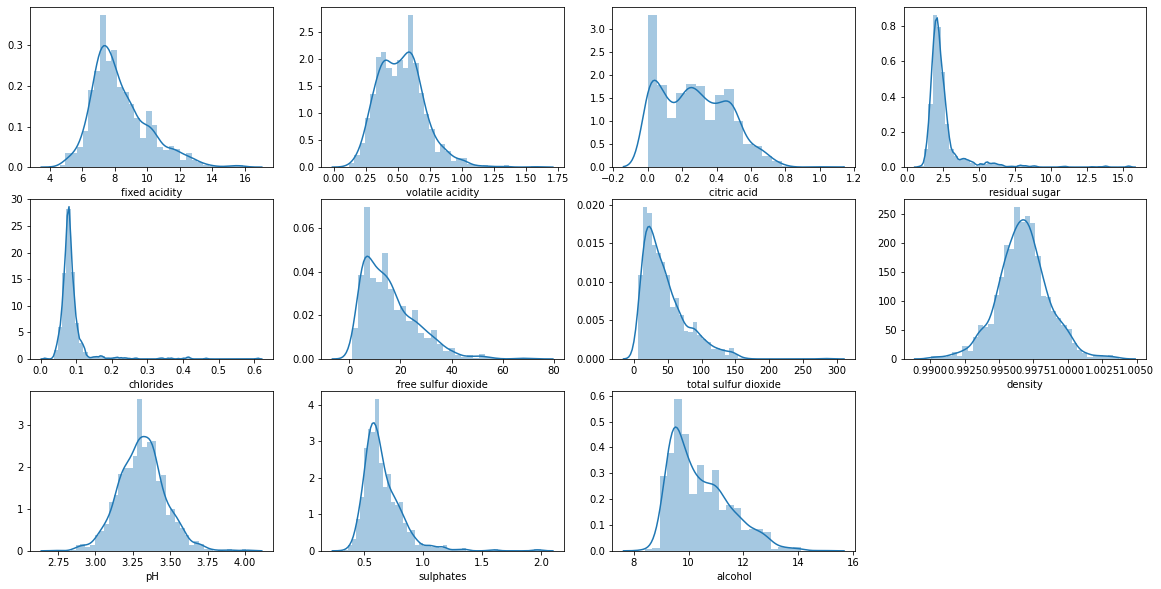

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [138]:
#checking the distribution curve for the features
plt.figure(figsize=(20,10))
pn=1
for col in df:
    if pn<=11:
        ax=plt.subplot(3,4,pn)
        sns.distplot(df[col])
    pn+=1
plt.show() 
df.skew()

as we can see all the columns except citric acid, density,ph and quality have very high skewness

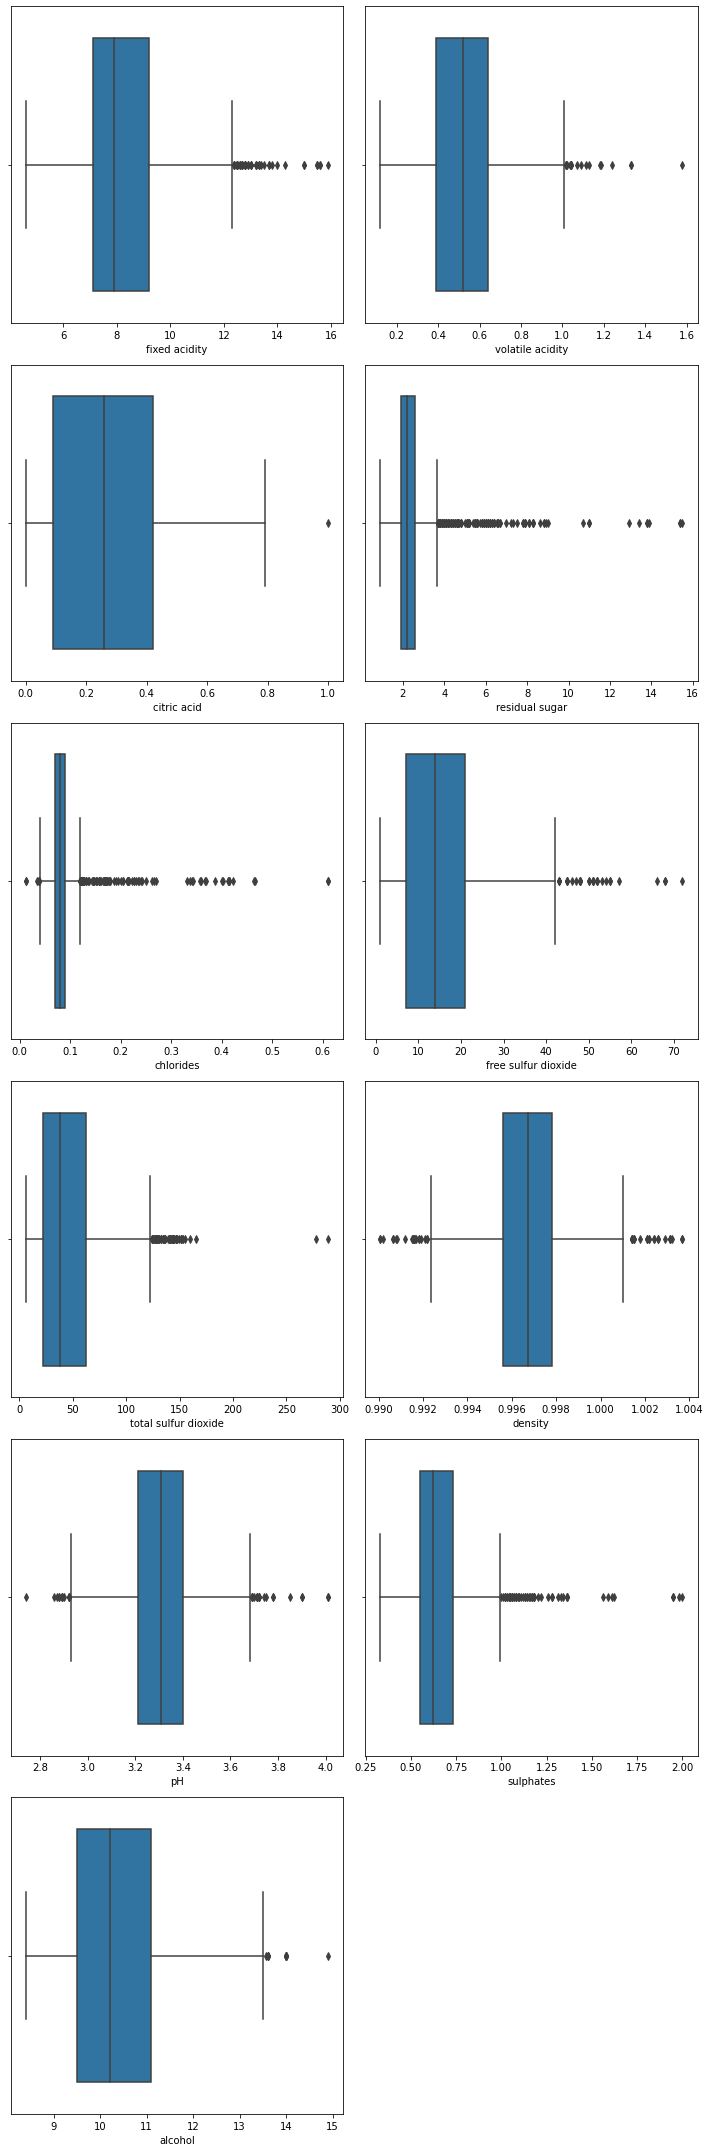

In [139]:
#boxplot to check the outliers
j=1
plt.figure(figsize=(10,30))
for col in df:
    if j<=11:
        plt.subplot(6,2,j)
        box=sns.boxplot(df[col])
    j+=1
plt.tight_layout()

all the columns have atleast some outliers

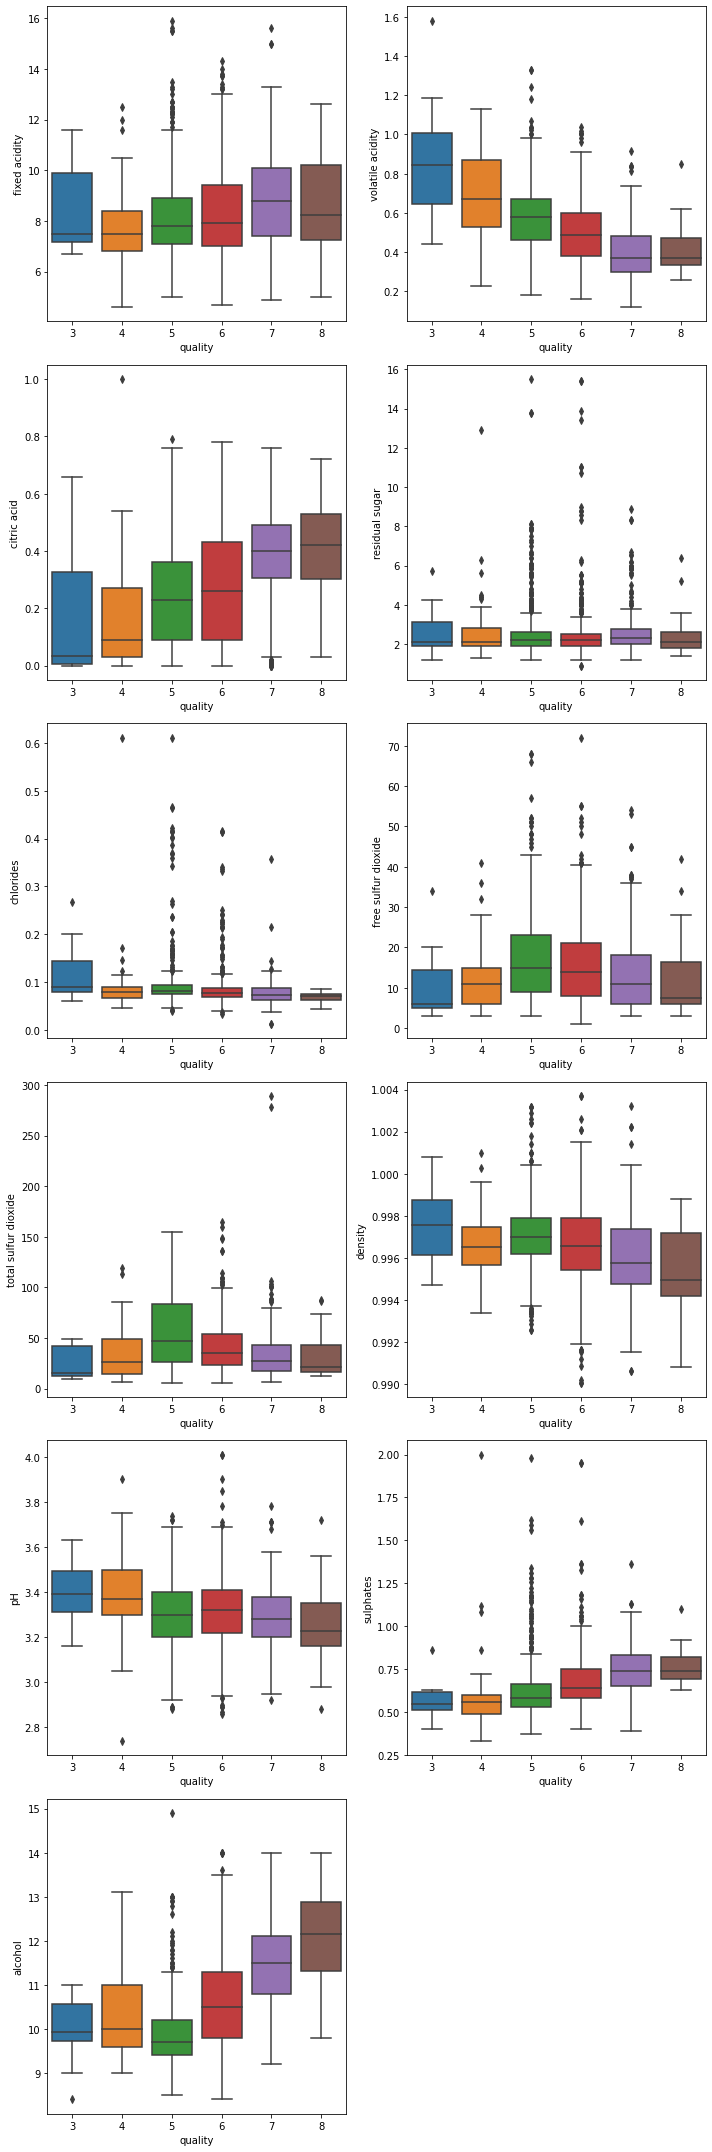

In [140]:
#bivariate analysis
#lable vs features
j=1
plt.figure(figsize=(10,30))
for col in df:
    if j<=11:
        plt.subplot(6,2,j)
        box=sns.boxplot(df['quality'],df[col])
    j+=1
plt.tight_layout()

from the above box plots for individual quality we can observe following trend vs quality:

1) increase in the quality when value increases for: fixed acidity,citric acid,sulphates,alcohol

2) decrease in the quality when value increases for:volatile acidity,residual sugar,chlorides,free sulfur dioxide,
total sulfur dioxide,density,ph vs quantity

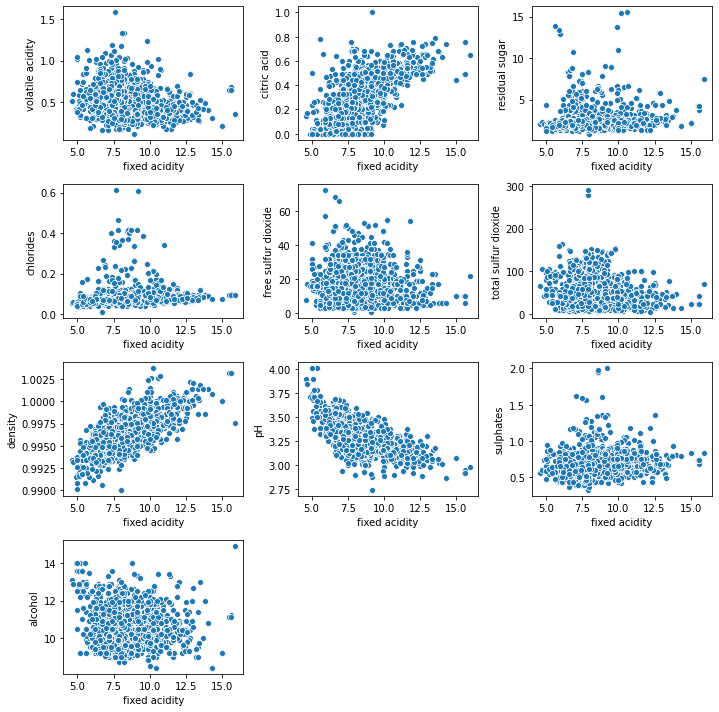

In [141]:
# fixed acidity vs all the features
features=['volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,10))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(4,3,j)
        sns.scatterplot(df['fixed acidity'],df[col])
    j+=1
plt.tight_layout()

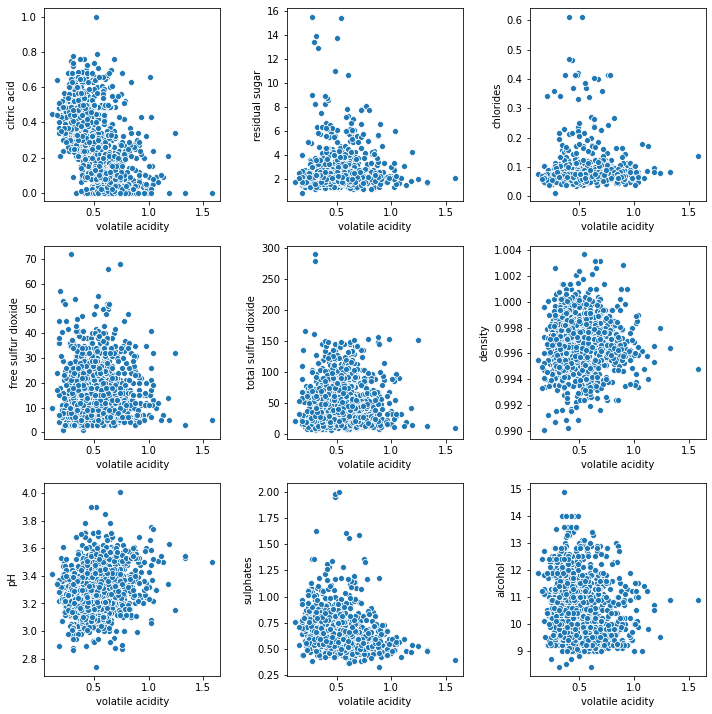

In [142]:
# volatile acidity vs all the remaining features
features=['citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,10))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(3,3,j)
        sns.scatterplot(df['volatile acidity'],df[col])
    j+=1
plt.tight_layout()

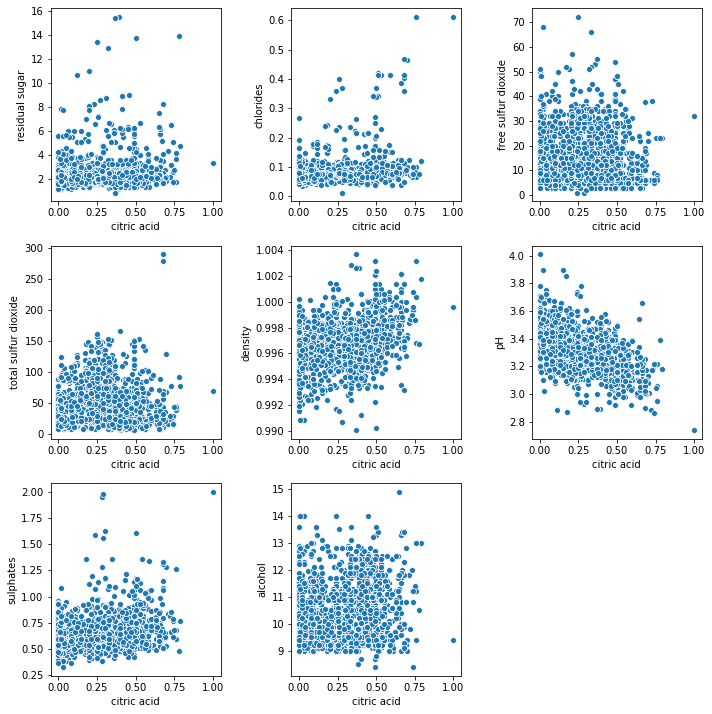

In [143]:
# citric acid vs remaining features
features=['residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,10))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(3,3,j)
        sns.scatterplot(df['citric acid'],df[col])
    j+=1
plt.tight_layout()

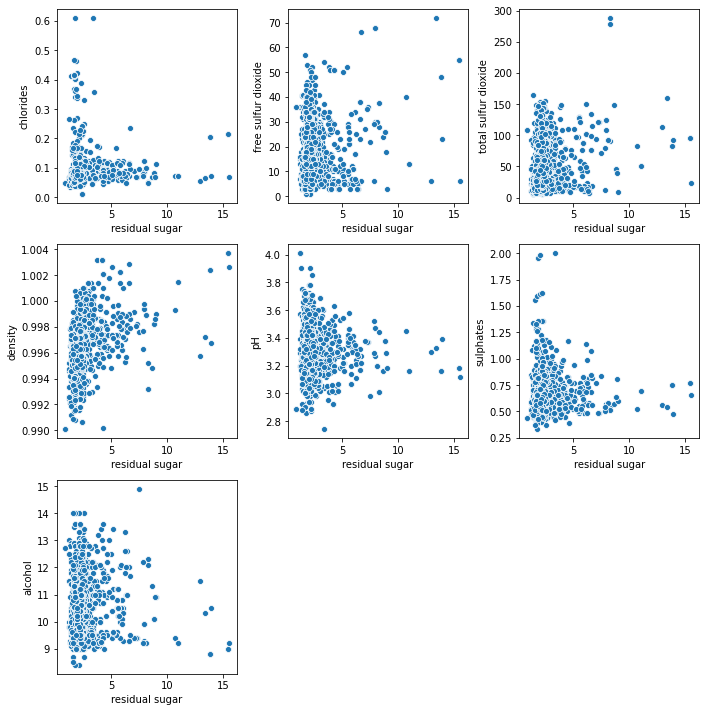

In [144]:
#residual vs remaining features
features=['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,10))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(3,3,j)
        sns.scatterplot(df['residual sugar'],df[col])
    j+=1
plt.tight_layout()

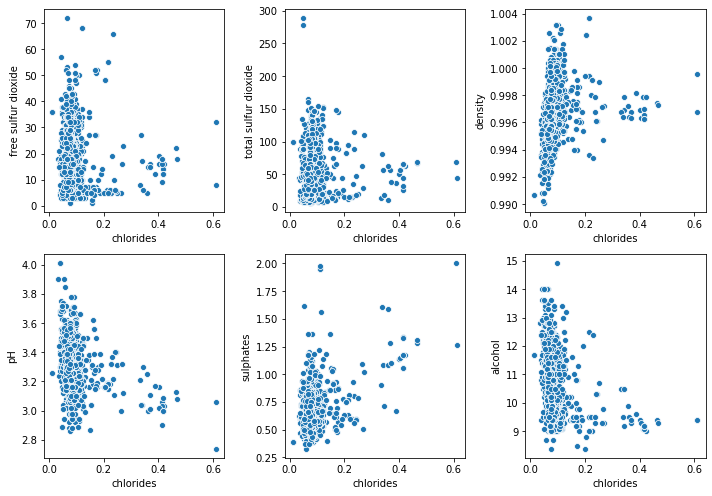

In [145]:
#chlorides vs remaining features
features=[ 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,7))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(2,3,j)
        sns.scatterplot(df['chlorides'],df[col])
    j+=1
plt.tight_layout()

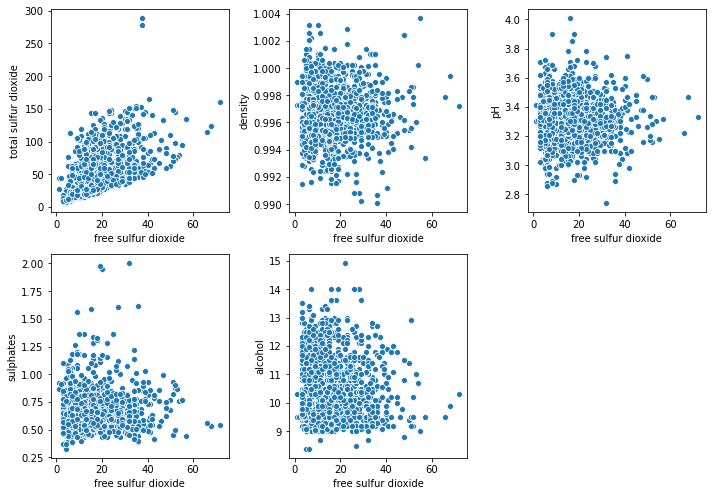

In [146]:
#free sulfur dioxide with remaining features
features=['total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,7))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(2,3,j)
        sns.scatterplot(df['free sulfur dioxide'],df[col])
    j+=1
plt.tight_layout()

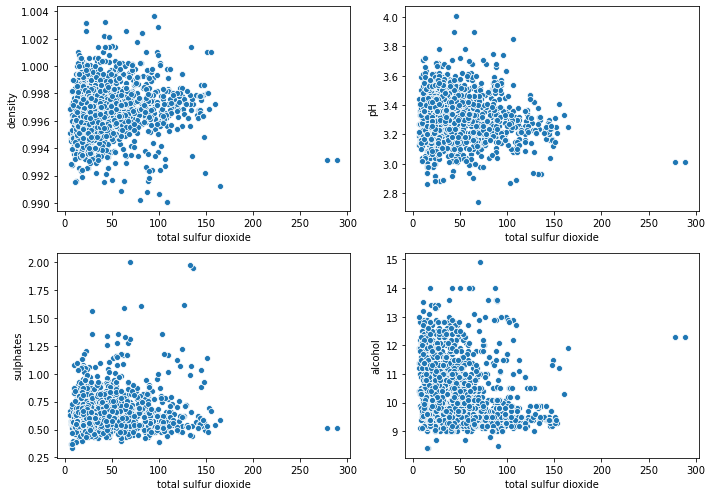

In [147]:
#total sulfur dioxide vs remaining features
features=['density','pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,7))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(2,2,j)
        sns.scatterplot(df['total sulfur dioxide'],df[col])
    j+=1
plt.tight_layout()

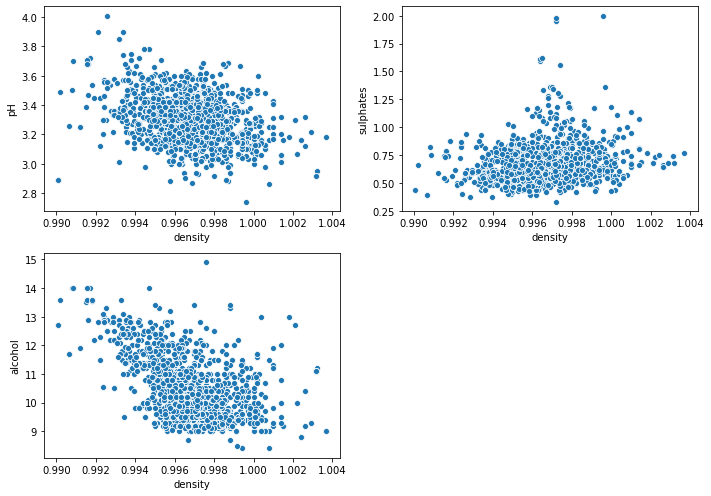

In [148]:
#density vs remaining features
features=['pH', 'sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,7))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(2,2,j)
        sns.scatterplot(df['density'],df[col])
    j+=1
plt.tight_layout()

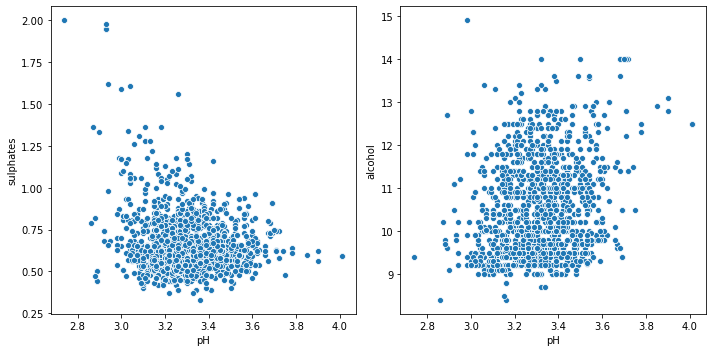

In [149]:
#pH vs remaining features
features=['sulphates', 'alcohol']
j=1
plt.figure(figsize=(10,5))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(1,2,j)
        sns.scatterplot(df['pH'],df[col])
    j+=1
plt.tight_layout()

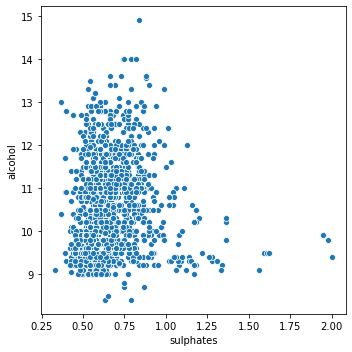

In [150]:
#alcohol vs remaining feature
features=['alcohol']
j=1
plt.figure(figsize=(5,5))
for col in df[features]:
    if j<=11:
        ax=plt.subplot(1,1,j)
        sns.scatterplot(df['sulphates'],df[col])
    j+=1
plt.tight_layout()

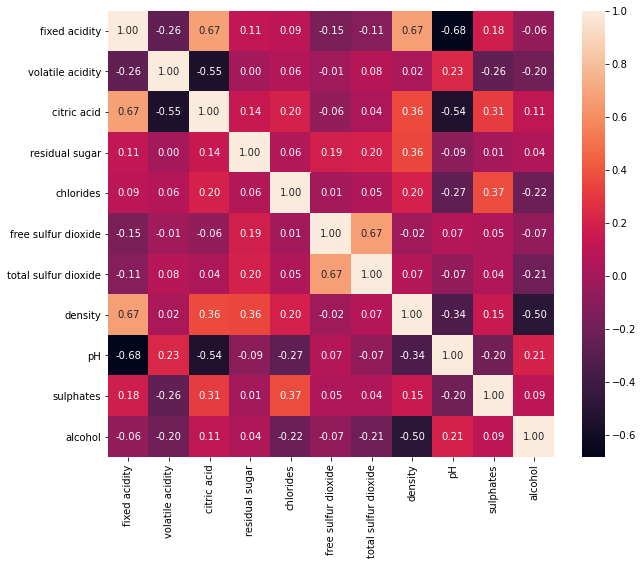

In [151]:
#multivariate analysis using correlation plot
plt.figure(figsize=(10,10))
corr=df.iloc[:,:11].corr()
sns.heatmap(corr,cbar=True,square=True,cbar_kws={"shrink":.82},fmt='.2f',annot=True,annot_kws={'size':10})

fixed acidity vs citric acid ,fixed acid vs density and free sulfur dioxide vs total sulfur dioxide shows highest value among others

Outlier and skewness removal

In [152]:
#converting qualtiy values into zeros and ones (quality >=7 is considered 1 and <7 is considered as 0)
ind=list(df[df['quality']>=7].index)
for i in range(0,1599):
    if i in ind:
        df['quality'].iloc[i]=1
    else:
        df['quality'].iloc[i]=0
 

In [153]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

we can clearly see heavy class imbalance 

In [154]:
#romoving gap between column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [155]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [156]:
#removing outliers using quantile method
df2=df
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1

highindex=np.where(df['fixed_acidity']>(q3.fixed_acidity+(1.5*iqr.fixed_acidity)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['fixed_acidity']<(q1.fixed_acidity-(1.5*iqr.fixed_acidity)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['volatile_acidity']>(q3.volatile_acidity+(1.5*iqr.volatile_acidity)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['volatile_acidity']<(q1.volatile_acidity-(1.5*iqr.volatile_acidity)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['citric_acid']>(q3.citric_acid+(1.5*iqr.citric_acid)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['citric_acid']<(q1.citric_acid-(1.5*iqr.citric_acid)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['residual_sugar']>(q3.residual_sugar+(1.5*iqr.residual_sugar)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['residual_sugar']<(q1.residual_sugar-(1.5*iqr.residual_sugar)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['chlorides']>(q3.chlorides+(1.5*iqr.chlorides)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['chlorides']<(q1.chlorides-(1.5*iqr.chlorides)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['free_sulfur_dioxide']>(q3.free_sulfur_dioxide+(1.5*iqr.free_sulfur_dioxide)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['free_sulfur_dioxide']<(q1.free_sulfur_dioxide-(1.5*iqr.free_sulfur_dioxide)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['total_sulfur_dioxide']>(q3.total_sulfur_dioxide+(1.5*iqr.total_sulfur_dioxide)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['total_sulfur_dioxide']<(q1.total_sulfur_dioxide-(1.5*iqr.total_sulfur_dioxide)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['density']>(q3.density+(1.5*iqr.density)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['density']<(q1.density-(1.5*iqr.density)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['pH']>(q3.pH+(1.5*iqr.pH)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['pH']<(q1.pH-(1.5*iqr.pH)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['sulphates']>(q3.sulphates+(1.5*iqr.sulphates)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['sulphates']<(q1.sulphates-(1.5*iqr.sulphates)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

highindex=np.where(df['alcohol']>(q3.alcohol+(1.5*iqr.alcohol)))
df=df.drop(df.index[highindex])
df.reset_index(inplace=True,drop=True)
lowindex=np.where(df['alcohol']<(q1.alcohol-(1.5*iqr.alcohol)))
df=df.drop(df.index[lowindex])
df.reset_index(inplace=True,drop=True)

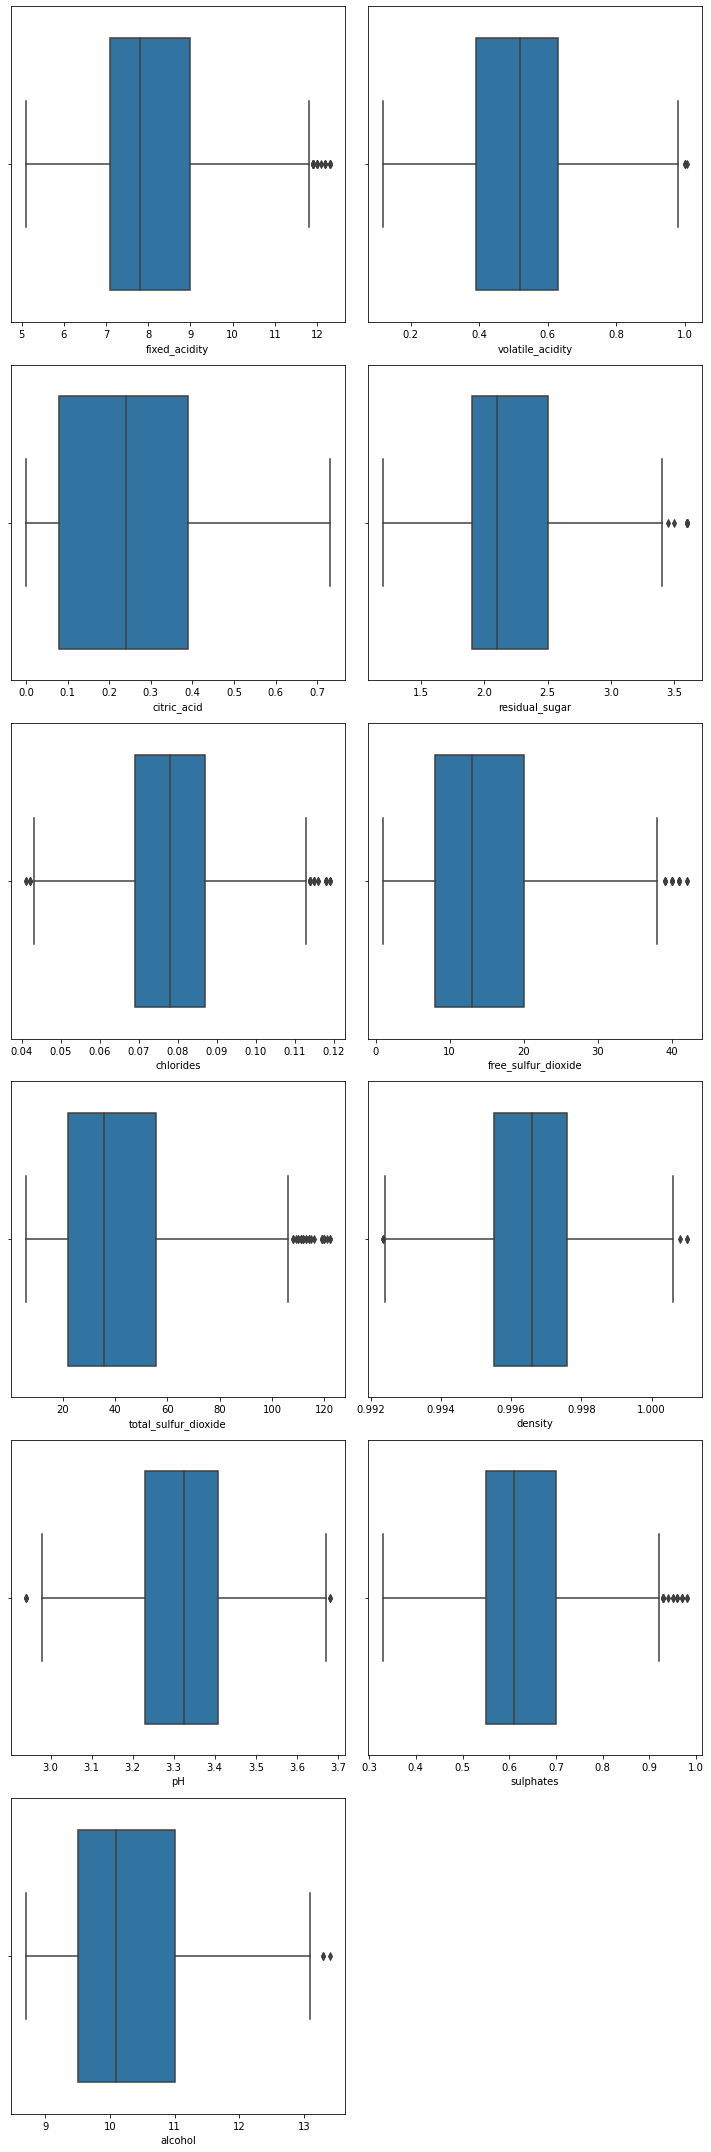

In [157]:
#Visualizing the output after removing outliers
j=1
plt.figure(figsize=(10,30))
for col in df:
    if j<=11:
        plt.subplot(6,2,j)
        box=sns.boxplot(df[col])
    j+=1
plt.tight_layout()

In [158]:
#new shape
df.shape

(1194, 12)

In [159]:
(1599-1194)/1599*100

25.328330206378986

we are losing 25% of data because of outlier removal

In [160]:
#reducing skewness uising power transformer method
pt=PowerTransformer(method='yeo-johnson')
df.iloc[:,:11]=pt.fit_transform(df.iloc[:,:11].values)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.437243,1.073662,-1.514993,-0.601485,-0.139409,-0.273520,-0.076642,0.769494,1.397607,-0.571074,-1.111568,0
1,-0.115361,1.992713,-1.514993,0.974187,1.341977,1.134486,1.030267,0.150310,-0.937781,0.523636,-0.490647,0
2,-0.115361,1.391319,-1.216997,0.362860,0.953785,0.230163,0.667141,0.274637,-0.476012,0.275167,-0.490647,0
3,1.774097,-1.561814,1.580429,-0.601485,-0.210664,0.443152,0.843206,0.892597,-1.248355,-0.368720,-0.490647,0
4,-0.437243,1.073662,-1.514993,-0.601485,-0.139409,-0.273520,-0.076642,0.769494,1.397607,-0.571074,-1.111568,0


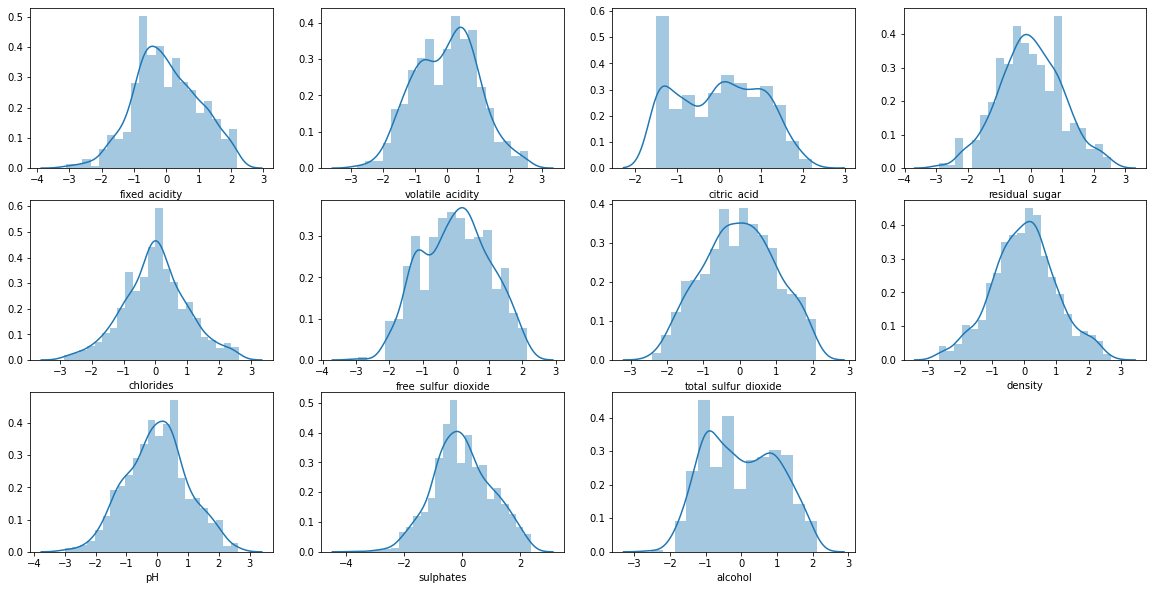

In [161]:
#checking ditribution for tansformed columns
plt.figure(figsize=(20,10))
pn=1
for col in df:
    if pn<=11:
        ax=plt.subplot(3,4,pn)
        sns.distplot(df[col])
    pn+=1
plt.show() 

The plot looks good 

In [162]:
df.skew()

fixed_acidity           0.019311
volatile_acidity        0.001318
citric_acid             0.024017
residual_sugar          0.002252
chlorides              -0.002574
free_sulfur_dioxide    -0.022423
total_sulfur_dioxide   -0.017291
density                 0.000059
pH                     -0.000542
sulphates               0.016782
alcohol                 0.121650
quality                 2.296977
dtype: float64

we can see all the skewness have been reduced to less than .5

In [163]:
#spliting features and lables
X=df.drop('quality',axis=1)
y=df['quality']

In [164]:
#scaling features
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [165]:
#checking multicollinearity using variation inflation method 
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,6.070099,fixed_acidity
1,2.101050,volatile_acidity
2,2.995867,citric_acid
3,1.581233,residual_sugar
4,1.300737,chlorides
5,2.617004,free_sulfur_dioxide
6,2.936754,total_sulfur_dioxide
7,5.473246,density
8,2.980259,pH
9,1.344966,sulphates


we can observe that fixed acidity followed by density have very high vif values. So first I am removing fixed acidity from the dataframe

In [166]:
#Droping fixed acidity and checking vif score
z=df.drop(['quality','fixed_acidity'],axis=1)
x_scaled=scaler.fit_transform(z)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=z.columns
vif

,vif,Features
0,2.099903,volatile_acidity
1,2.780268,citric_acid
2,1.532696,residual_sugar
3,1.294407,chlorides
4,2.601953,free_sulfur_dioxide
5,2.870548,total_sulfur_dioxide
6,2.665277,density
7,1.426022,pH
8,1.331344,sulphates
9,2.351192,alcohol


Now vif values looks good

In [167]:
x_scaled=pd.DataFrame(data=x_scaled,columns=z.columns)

In [168]:
x_scaled.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,1.073662,-1.514993,-0.601485,-0.139409,-0.273520,-0.076642,0.769494,1.397607,-0.571074,-1.111568
1,1.992713,-1.514993,0.974187,1.341977,1.134486,1.030267,0.150310,-0.937781,0.523636,-0.490647
2,1.391319,-1.216997,0.362860,0.953785,0.230163,0.667141,0.274637,-0.476012,0.275167,-0.490647
3,-1.561814,1.580429,-0.601485,-0.210664,0.443152,0.843206,0.892597,-1.248355,-0.368720,-0.490647
4,1.073662,-1.514993,-0.601485,-0.139409,-0.273520,-0.076642,0.769494,1.397607,-0.571074,-1.111568


In [169]:
#spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=51)

In [170]:
#due to class imbalance totl rows which contains 1 as quality in training set is resampled to match rows with 0
cat=pd.concat([X_train,y_train],axis=1)
zero=cat[cat['quality']==0]
one=cat[cat['quality']==1]
one_resampled=resample(one,replace=True,n_samples=len(zero),random_state=27)
upsample=pd.concat([zero,one_resampled])
new_x_train=upsample.drop('quality',axis=1)
new_y_train=upsample['quality']


In [171]:
#models used for this analysis
rfc=RandomForestClassifier()
lr=LogisticRegression()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
svc=SVC()

In [172]:
#checking accuracy and cross validation score for the selected models using training data
acc=[]
cv=[]
diff=[]
j=0
models=[rfc,lr,knc,dtc,bc,gbc,svc]
for i in models:
    i.fit(new_x_train,new_y_train)
    pred=i.predict(X_test)
    acc.append(accuracy_score(y_test,pred))
    cv.append(cross_val_score(i,new_x_train,new_y_train,cv=5).mean())
    diff.append(acc[j]-cv[j])
    j+=1
best_model=pd.DataFrame({'Model Name':[str(i).replace('(','').replace(')','') for i in models],
                     'Accuracy':acc,
                     'Cross Validation Score':cv,'Difference':np.abs(diff)})
best_model.sort_values(by='Difference')

,Model Name,Accuracy,Cross Validation Score,Difference
1,LogisticRegression,0.777215,0.798424,0.021209
6,SVC,0.860759,0.901718,0.040959
4,BaggingClassifier,0.898734,0.966528,0.067794
5,GradientBoostingClassifier,0.868354,0.946591,0.078237
0,RandomForestClassifier,0.901266,0.980058,0.078793
3,DecisionTreeClassifier,0.870886,0.957972,0.087085
2,KNeighborsClassifier,0.784810,0.893889,0.109079


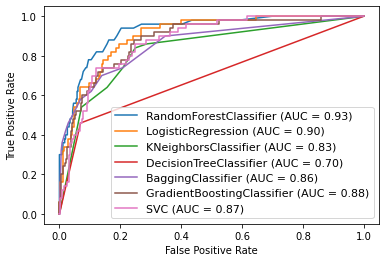

In [173]:
disp=plot_roc_curve(rfc,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

we can see Random Forest Classifier has good AUC score as well as accuracy, so I am choosing it for further analysis

In [32]:
#instantiating parameters for RFC
param_grid = {'bootstrap': [True,False],
              'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
               'n_estimators': [100, 200, 300, 1000]
              }

In [37]:
#Applying Grid Search CV to find the best parameters
grd=GridSearchCV(rfc,param_grid=param_grid,scoring='accuracy')
grd.fit(new_x_train,new_y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy')

In [174]:
#the best parameters
grd.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [175]:
#instantiating the best parameter to the model
rfc=grd.best_estimator_

In [176]:
rfc.fit(new_x_train,new_y_train)
y_pred=rfc.predict(X_test)

In [177]:
accuracy_score(y_test,y_pred)

0.8936708860759494

we can see very slight increase in the accuracy

In [178]:
#conclusive results for RFC
y_pred=rfc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('Metrics calculated for Random Forest Classifier:\n')
print('True Positive:',cm[0][0])
print('False Positive:',cm[0][1])
print('False Negative:',cm[1][0])
print('True Negative:',cm[1][1])
print('\nAccuracy:',accuracy_score(y_test,y_pred)*100,'%')

Metrics calculated for Random Forest Classifier:

True Positive: 329
False Positive: 16
False Negative: 26
True Negative: 24

Accuracy: 89.36708860759494 %


In [179]:
#saving the model
filename = 'Mushroom_Practice_Project'
pickle.dump(rfc, open(filename, 'wb'))